# Measuring performance of sorting algorithms

We have some sorting algorithms and some theoretical results of how well they perform, how can we compare these empirically?

In [1]:
print("hello world")

hello world


In [4]:
import random

random.seed(42)
def generate_random_array(n):
    output = []
    for i in range(n):
        output.append(random.randint(0, 1_000_000))
    return output

random_data = generate_random_array(10)
print(random_data)

random_data.sort()
print(random_data)

[670487, 116739, 26225, 777572, 288389, 256787, 234053, 146316, 772246, 107473]
[26225, 107473, 116739, 146316, 234053, 256787, 288389, 670487, 772246, 777572]


In [ ]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

[229258, 243962, 529903, 631262, 27824, 588508, 208496, 750800, 681453, 735392]
[27824, 208496, 229258, 243962, 529903, 588508, 631262, 681453, 735392, 750800]


In [46]:
import time
# generate some random data of size N
# measure the time it takes to sort using python sort
# measure the time it takes to sort using insertion sort
# report the results

def run_experiment(n_repeats, n_data, sorting_algorithm):
    # take a sorting algorithm, amount of data, number of repeats
    total_sorting_time = 0.0
    for experiment_iteration in range(n_repeats):
        random_data = generate_random_array(n_data)

        start_time = time.time()
        sorting_algorithm(random_data)
        end_time = time.time()

        sorting_time = end_time - start_time
        total_sorting_time += sorting_time
    average_sorting_time = total_sorting_time / n_repeats
    return average_sorting_time

def builtin_sort(arr):
    arr.sort()


# x: amount of data being sorted
# y_builtin: average of K repeats of the experiment with num_data = x
# y_insertion: average of K repeats of the experiment with num_data = x

xs = []
y_builtin = []
y_insertion = []

n_repeats = 10
# iterate over the amount of data being sorted
for n_data in [1, 10, 100, 1000, 5000]:
    xs.append(n_data)

    builtin_average = run_experiment(n_repeats, n_data, builtin_sort)
    insertion_average = run_experiment(n_repeats, n_data, insertion_sort)

    y_builtin.append(builtin_average)
    y_insertion.append(insertion_average)

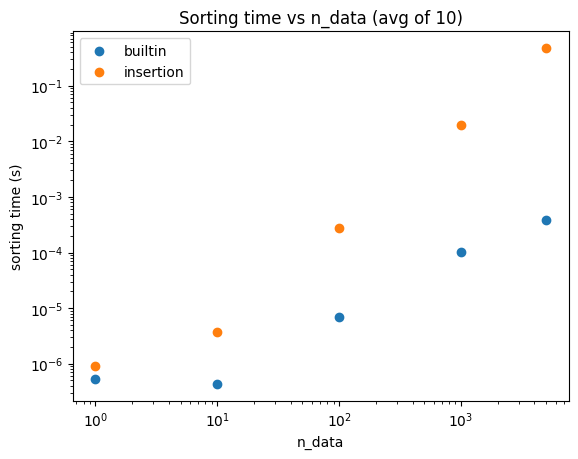

In [47]:
import matplotlib.pyplot as plt
plt.scatter(xs, y_builtin, label="builtin")
plt.scatter(xs, y_insertion, label="insertion")
plt.ylabel("sorting time (s)")
plt.xlabel("n_data")
plt.xscale("log")
plt.yscale("log")
plt.title(f"Sorting time vs n_data (avg of {n_repeats})")
plt.legend()
plt.show()